   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3    

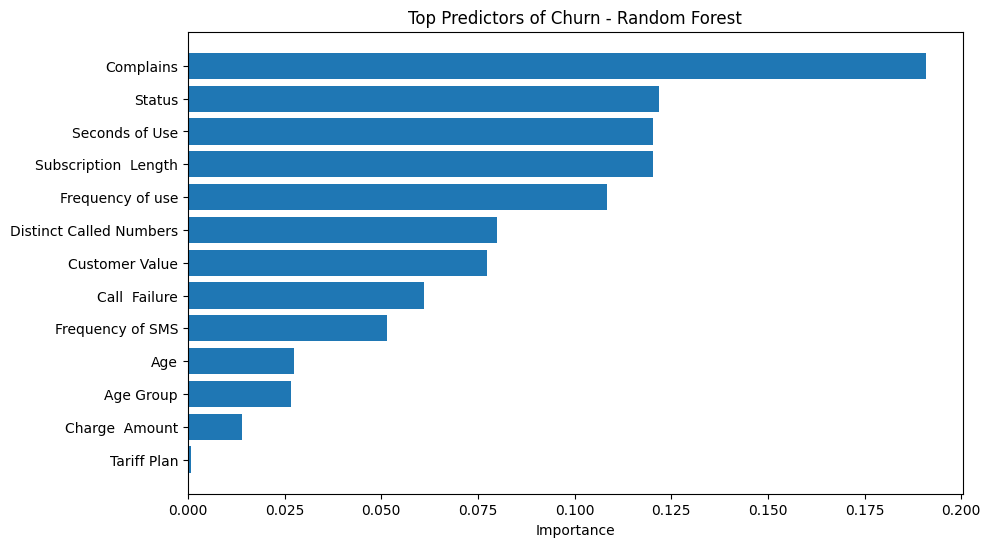


Top 10 Predictors of Churn:
                     Feature  Importance
1                 Complains    0.190857
10                   Status    0.121877
4            Seconds of Use    0.120230
2      Subscription  Length    0.120211
5          Frequency of use    0.108261
7   Distinct Called Numbers    0.079833
12           Customer Value    0.077397
0             Call  Failure    0.060959
6          Frequency of SMS    0.051546
11                      Age    0.027344


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("C:/Users/Ravin/Documents/Graduate MDSA UCALGARY/DATA 607/Data-607-Project/iranian+churn+dataset/Customer Churn.csv")

# Inspect
print(df.head())
print(df.info())

# Target variable
target = 'Churn'  # adjust if the column name differs
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# 3. Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

# 4. Train & Evaluate
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Store results for later analysis
    results[name] = pipe

# 5. Feature Importance from Random Forest
# 5. Feature Importance from Random Forest
rf_pipe = results["Random Forest"]
rf_model = rf_pipe.named_steps['classifier']

# Since all features are numeric, just use num_cols as feature names
feature_names = num_cols  

importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'].head(15), feat_imp_df['Importance'].head(15))
plt.gca().invert_yaxis()
plt.title("Top Predictors of Churn - Random Forest")
plt.xlabel("Importance")
plt.show()

print("\nTop 10 Predictors of Churn:\n", feat_imp_df.head(10))


